In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
# Define the path to the Excel file
file_path = r"../data-set/prediction-data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(data.head())


  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   99962-AND  Female   63      No  Andhra Pradesh                    7   
1   99942-TEL  Female   34      No       Telangana                    0   
2   99942-KER    Male   59     Yes          Kerala                    8   
3   99912-WES  Female   60     Yes     West Bengal                   11   
4   99898-MAH  Female   39      No     Maharashtra                    2   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 1     Deal 2           Yes            Yes  ...   
1                34        NaN           Yes            Yes  ...   
2                18        NaN           Yes             No  ...   
3                26     Deal 4           Yes             No  ...   
4                14        NaN           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      91.599998   4627.799805           0.0   
1      Cre

In [2]:
#data preprocessing
#drop columns that won't be used for the prediction (axis =0 drop the rows, axis = 1 the column)
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]

# Encode categorical variables except the target variable(Label encode means machine learning can't understand the text,mc understand in numbers only 
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets(80% for training20% for testing random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Initialize the Random Forest Classifier(100 decision trees)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[806  58]
 [117 221]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       864
           1       0.79      0.65      0.72       338

    accuracy                           0.85      1202
   macro avg       0.83      0.79      0.81      1202
weighted avg       0.85      0.85      0.85      1202



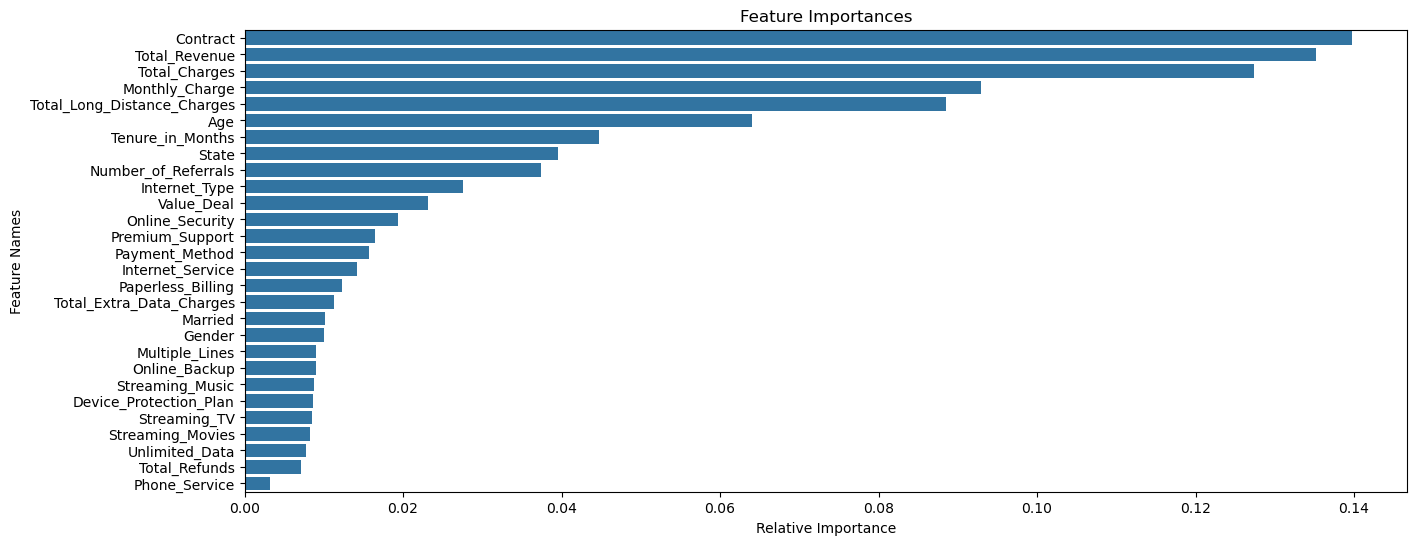

In [4]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()




In [5]:
# Define the path to the Joiner Data Excel file
file_path = r"../data-set/prediction-data.xlsx"

 

# Define the sheet name to read data from

sheet_name = 'vw_JoinData'

 

# Read the data from the specified sheet into a pandas DataFrame

new_data = pd.read_excel(file_path, sheet_name=sheet_name)

 

# Display the first few rows of the fetched data

print(new_data.head())

 

# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

 

# Retain the Customer_ID column

customer_ids = new_data['Customer_ID']

 

# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

 

# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

 

# Make predictions

new_predictions = rf_model.predict(new_data)

 

# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

 

# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

 

# Save the results

original_data.to_csv(r"../data-set/predictions.csv", index=False)

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   13058-MAD  Female   58      No  Madhya Pradesh                   13   
1   13123-BIH  Female   46      No           Bihar                   13   
2   21165-DEL  Female   38      No           Delhi                    2   
3   21247-ASS    Male   58     Yes           Assam                    2   
4   21288-MAH  Female   63      No     Maharashtra                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                22        NaN           Yes             No  ...   
1                18     Deal 5           Yes             No  ...   
2                32     Deal 5           Yes             No  ...   
3                 2        NaN           Yes             No  ...   
4                34        NaN           Yes            Yes  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      46.099998    130.149994           0.0   
1  Bank Wi